In [4]:
from src import utils

import numpy as np
import os
import json
import pickle
import pandas as pd
import joblib

from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier


# 3 Algoritma klasifikasi
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score



## No 1

In [5]:
deserialize_data = utils.deserialize_data

X_train = deserialize_data("data/processed/X_train_ros.pkl")
y_train = deserialize_data("data/processed/y_train_ros.pkl")

In [6]:
param_logreg = {
    'C': [0.1, 1.0],
    'solver': ['liblinear', 'lbfgs']
}

param_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10]
}

param_svc = {
    'C': [0.1, 1.0],
    'kernel': ['linear', 'rbf']
}


param_knn = {
    'n_neighbors': [3, 5],
    'weights': ['uniform', 'distance']
}


# === 2. Buat instance model dengan n_jobs = -1 jika didukung ===
model_logreg = LogisticRegression(n_jobs=-1)
model_rf = RandomForestClassifier(n_jobs=-1)
model_svc = SVC()  # SVC tidak mendukung n_jobs secara default
model_knn = KNeighborsClassifier(n_jobs=-1)

def train_model_with_tuning(model, param_grid, X_train, y_train, n_iter=5):
    """
    Melatih model dengan hyperparameter tuning menggunakan RandomizedSearchCV.

    Parameters:
    -----------
    model : sklearn estimator
        Instance model yang akan dilatih.
    param_grid : dict
        Dictionary hyperparameter dengan key sebagai nama parameter dan value sebagai list nilai-nilainya.
    X_train : array-like
        Fitur data latih.
    y_train : array-like
        Target/label data latih.
    n_iter : int
        Jumlah kombinasi acak yang akan diuji.

    Returns:
    --------
    random_search : RandomizedSearchCV
        Hasil instance RandomizedSearchCV yang telah dilatih.
    """
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grid,
        n_iter=n_iter,
        n_jobs=-1,
        verbose=3,
        cv=3,
        random_state=42
    )
    random_search.fit(X_train, y_train)
    return random_search

# === 4. Latih semua model ===
tuned_logreg = train_model_with_tuning(model_logreg, param_logreg, X_train, y_train, n_iter=2)
print('TUNED LOGREG')
tuned_rf = train_model_with_tuning(model_rf, param_rf, X_train, y_train, n_iter=2)
print('TUNED RF')
tuned_knn = train_model_with_tuning(model_knn, param_knn, X_train, y_train, n_iter=2)
print('TUNED KNN')


# === 5. Serialize model hasil pelatihan ===
serialize_data = utils.serialize_data

serialize_data(tuned_logreg, "models/models_pkl/logreg_model.pkl")
serialize_data(tuned_rf, "models/models_pkl/rf_model.pkl")
serialize_data(tuned_knn, "models/models_pkl/knn_model.pkl")


Fitting 3 folds for each of 2 candidates, totalling 6 fits


/home/fullkersa/BTG_MLPROCESS/ENV_JANCOK/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/fullkersa/BTG_MLPROCESS/ENV_JANCOK/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

[CV 1/3] END ...............C=0.1, solver=lbfgs;, score=0.768 total time=   0.5s
[CV 2/3] END ...............C=0.1, solver=lbfgs;, score=0.756 total time=   0.5s
[CV 3/3] END ...............C=0.1, solver=lbfgs;, score=0.734 total time=   0.5s
[CV 1/3] END ...............C=1.0, solver=lbfgs;, score=0.732 total time=   0.5s
[CV 2/3] END ...............C=1.0, solver=lbfgs;, score=0.732 total time=   0.5s
[CV 3/3] END ...............C=1.0, solver=lbfgs;, score=0.728 total time=   0.5s


/home/fullkersa/BTG_MLPROCESS/ENV_JANCOK/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


TUNED LOGREG
Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV 3/3] END ....max_depth=10, n_estimators=100;, score=0.868 total time=   0.6s
[CV 2/3] END ....max_depth=10, n_estimators=100;, score=0.873 total time=   2.0s
[CV 1/3] END ....max_depth=10, n_estimators=100;, score=0.866 total time=   2.1s
[CV 1/3] END ..max_depth=None, n_estimators=100;, score=0.979 total time=   2.1s
[CV 2/3] END ..max_depth=None, n_estimators=100;, score=0.987 total time=   2.2s
[CV 3/3] END ..max_depth=None, n_estimators=100;, score=0.987 total time=   2.1s
TUNED RF
Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV 2/3] END ...n_neighbors=3, weights=distance;, score=0.902 total time=   1.9s
[CV 1/3] END ...n_neighbors=3, weights=distance;, score=0.888 total time=   1.9s
[CV 3/3] END ...n_neighbors=3, weights=distance;, score=0.900 total time=   2.0s
[CV 2/3] END ...n_neighbors=5, weights=distance;, score=0.898 total time=   1.9s
[CV 1/3] END ...n_neighbors=5, weights=distance;, 

## No 2

In [7]:
deserialize_data = utils.deserialize_data

X_valid = deserialize_data("data/processed/X_valid_prep.pkl")
y_valid = deserialize_data("data/interim/y_valid.pkl")

logreg = deserialize_data("models/models_pkl/logreg_model.pkl")
rf = deserialize_data("models/models_pkl/rf_model.pkl")
knn = deserialize_data("models/models_pkl/knn_model.pkl")

In [8]:
def threshold_tuning(
    model, 
    X_val, 
    y_val, 
    metric: str = "f1-score", 
    average: str = "macro", 
    model_name: str = "model"
):
    """
    Melakukan threshold tuning pada model klasifikasi berbasis probabilitas.

    Parameters:
    ----------
    model : object
        Model klasifikasi yang telah dilatih dan memiliki metode `predict_proba`.
    X_val : array-like
        Fitur dari data validasi.
    y_val : array-like
        Target asli dari data validasi.
    metric : str, default="f1-score"
        Metrik evaluasi yang ingin dioptimasi. Pilihan: "precision", "recall", "f1-score", atau "accuracy".
    average : str, default="macro"
        Tipe averaging untuk classification report. Pilihan: "macro", "micro", "weighted".
    model_name : str, default="model"
        Nama dari model, untuk dicatat dalam hasil output.

    Returns:
    -------
    thresholds : list of float
        Daftar nilai threshold yang diuji.
    results : list of dict
        Daftar dictionary berisi threshold, metrik, dan nama model untuk plotting atau evaluasi lanjutan.
    """

    # Pastikan model memiliki metode predict_proba
    if not hasattr(model, "predict_proba"):
        raise ValueError("Model tidak memiliki metode predict_proba.")

    # Prediksi probabilitas untuk kelas positif (asumsikan binary klasifikasi, ambil kolom ke-1)
    probas = model.predict_proba(X_val)[:, 1]
    
    thresholds = np.linspace(0, 1, 100)
    results = []

    for thresh in thresholds:
        preds = (probas >= thresh).astype(int)
        
        if metric.lower() == "accuracy":
            score = accuracy_score(y_val, preds)
        else:
            report = classification_report(y_val, preds, output_dict=True, zero_division=0)
            try:
                score = report[average][metric]
            except KeyError:
                raise ValueError(f"Metric '{metric}' dengan average '{average}' tidak ditemukan dalam classification report.")

        results.append({
            "model": model_name,
            "threshold": thresh,
            "metric": metric,
            "average": average,
            "value": score
        })

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, [r["value"] for r in results], marker='o')
    plt.title(f"{model_name} - {average} {metric} vs Threshold")
    plt.xlabel("Threshold")
    plt.ylabel(f"{average} {metric}")
    plt.grid(True)
    plt.show()

    return thresholds.tolist(), results


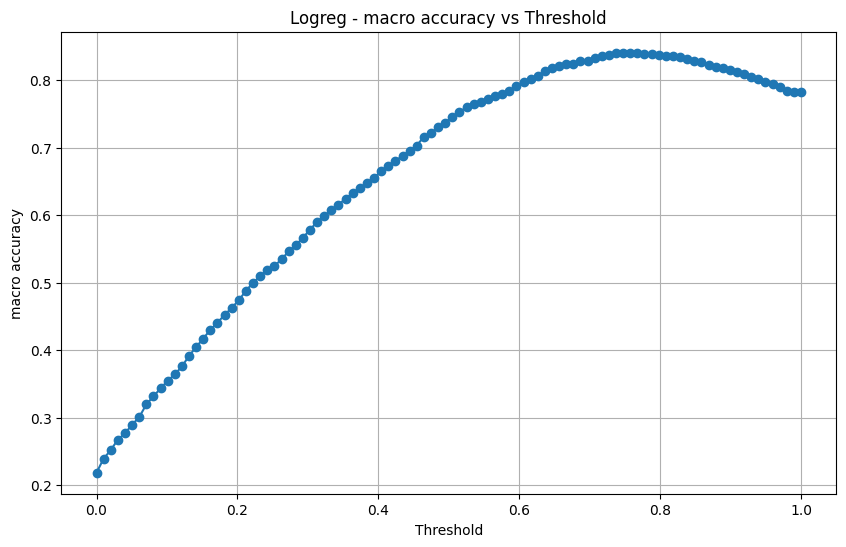

In [9]:
thresholds_lr, results_lr = threshold_tuning(
    model=logreg, 
    X_val=X_valid, 
    y_val=y_valid, 
    metric="accuracy", 
    average="macro", 
    model_name="Logreg"
)


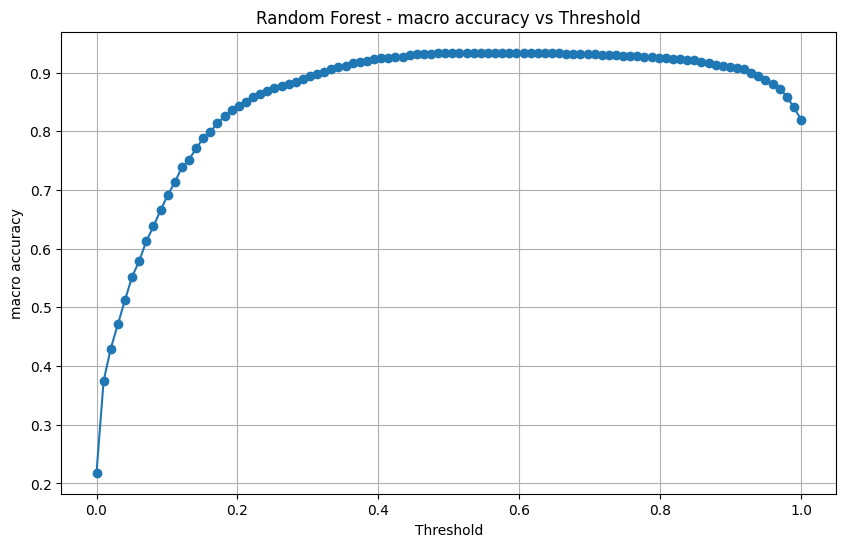

In [10]:
thresholds_rf, results_rf = threshold_tuning(
    model=rf, 
    X_val=X_valid, 
    y_val=y_valid, 
    metric="accuracy", 
    average="macro", 
    model_name="Random Forest"
)


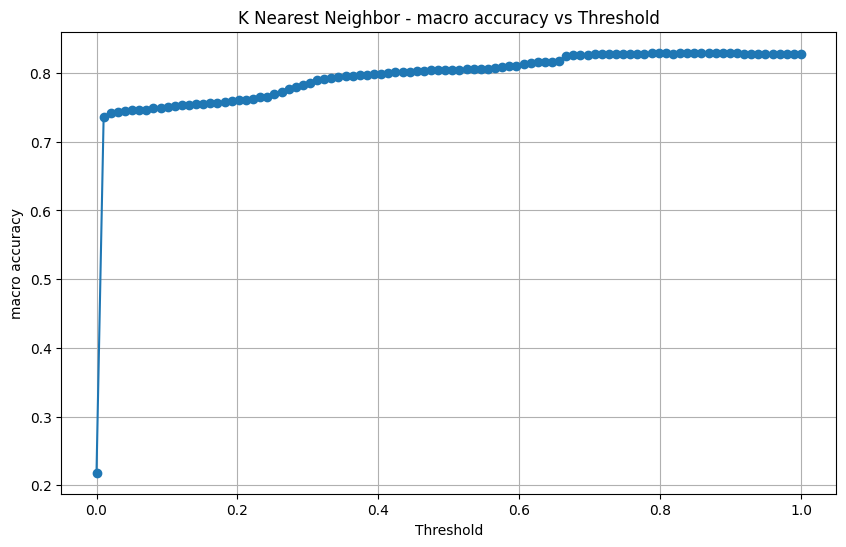

In [11]:
thresholds_knn, results_knn = threshold_tuning(
    model=knn, 
    X_val=X_valid, 
    y_val=y_valid, 
    metric="accuracy", 
    average="macro", 
    model_name="K Nearest Neighbor"
)


In [12]:
def pilih_threshold_terbaik(daftar_threshold_models, output_path: str):
    """
    Memilih threshold terbaik dari hasil tuning beberapa model klasifikasi.

    Parameters:
    ----------
    daftar_threshold_models : list of list of dict
        Setiap elemen dalam daftar ini adalah hasil threshold tuning dari satu model,
        dalam bentuk list of dict seperti yang dikembalikan oleh fungsi threshold_tuning.
    output_path : str
        Path untuk menyimpan file JSON berisi informasi threshold terbaik yang terpilih.

    Returns:
    -------
    best_threshold_info : dict
        Dictionary berisi informasi threshold terbaik (model, nilai threshold, metric, value, dll).
    """

    # Gabungkan semua threshold dari seluruh model
    semua_data = []
    for hasil_model in daftar_threshold_models:
        semua_data.extend(hasil_model)

    df = pd.DataFrame(semua_data)

    # Urutkan dari yang metrik-nya paling tinggi ke rendah
    df_sorted = df.sort_values(by="value", ascending=False).reset_index(drop=True)

    # Ambil threshold terbaik
    best_threshold_info = df_sorted.iloc[0].to_dict()

    # Simpan ke dalam file JSON
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    with open(output_path, "w") as f:
        json.dump(best_threshold_info, f, indent=4)

    return best_threshold_info


In [13]:
all_threshold_results = [results_rf, results_lr, results_knn]

best_threshold = pilih_threshold_terbaik(all_threshold_results, "output/best_threshold.json")

print("Threshold terbaik:", best_threshold)

Threshold terbaik: {'model': 'Random Forest', 'threshold': 0.5858585858585859, 'metric': 'accuracy', 'average': 'macro', 'value': 0.9340085942295887}


In [14]:
def evaluasi_model_dengan_threshold(model, threshold_info, X_test, y_test):
    """
    Melakukan evaluasi model pada data test menggunakan threshold terbaik.

    Parameters:
    ----------
    model : object
        Model klasifikasi yang telah dilatih dan memiliki metode `predict_proba`.
    threshold_info : dict
        Dictionary hasil dari fungsi `pilih_threshold_terbaik`, berisi threshold dan info metrik.
    X_test : array-like
        Data fitur test.
    y_test : array-like
        Target asli dari data test.

    Returns:
    -------
    y_pred : array
        Hasil prediksi label setelah thresholding.
    """

    # Ambil threshold terbaik
    threshold = threshold_info["threshold"]

    # Prediksi probabilitas kelas positif
    y_proba = model.predict_proba(X_test)[:, 1]

    # Thresholding untuk menghasilkan prediksi akhir
    y_pred = (y_proba >= threshold).astype(int)

    # Print classification report
    print("=== Classification Report (Test Set) ===")
    print(classification_report(y_test, y_pred, zero_division=0))

    return y_pred

In [15]:

X_test = deserialize_data("data/processed/X_test_prep.pkl")
y_test = deserialize_data("data/interim/y_test.pkl")

# Load model (misalnya Random Forest yang sebelumnya dipilih)
model_terbaik = joblib.load("models/models_pkl/rf_model.pkl")

# Load threshold terbaik
with open("output/best_threshold.json") as f:
    threshold_info = json.load(f)


# Evaluasi
y_pred = evaluasi_model_dengan_threshold(model_terbaik, threshold_info, X_test, y_test)


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      2548
           1       0.97      0.71      0.82       711

    accuracy                           0.93      3259
   macro avg       0.95      0.85      0.89      3259
weighted avg       0.93      0.93      0.93      3259

